# Lab Assignment Four: Evaluation and Multi-Layer Perceptron
**- Wen Yang (47781972)**  
**- Ziling Feng (47781816)**  
**- Zheqi Wang (47711564)**  
**- Beichen Hu (47809766)**  

## Data Preparation (15 points total) 
## Business Understanding  
ASL stands for American Sign Language, ASL emerged as a language in the American School for the Deaf (ASD), founded in 1817. A reliable estimate for ASL users in the United States ranges from 250,000 to 500,000, including some deaf children. Moreover, ASL is not only important for deaf people, we believe that this language is also very important for children nowadays, and this language should be widely promoted to primary schools.  

There are 26 letters, A-Z, and three other gestures, which are spaces, nothing and delete, in our data package. There are 10,440 images, and all of them are 200*200 in size.  

I think the police will be interested in our prediction model. We think about this because we received the Amber alert on the phone previously, meaning that the children were kidnapped. If there is no way to cry out for help during the process of being kidnapped, ASL gestures would be useful. Children who have been kidnapped and learned ALS gestures can use ASL gestures anywhere in the camera and monitoring, such as SOS, surrounding conditions, etc. In this way, the police can take screenshots according to the camera and monitoring. Sometimes the pixels of the pictures are not so clear to recognize the gestures by people, then we can use our model. 
We could know the specific gestures through running the model in order to provide some clues and police could rescue them much faster.  

This model is an offline model, because the model is used after the kidnapping. The police can use the camera to capture the unclear photos, apply to our model, and analyze the gestures to know the children's situation, so we could save them faster.  


## Data Preparation

For this part, we mainly convert images to numpy array. Also we make every images a row preparing for latter process.  
Firstly, let's import all the packages we need.

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from PIL import Image
import copy
from pandas import DataFrame

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Then we print all category name. By the way, the ".DS_Store" is hidden folder for MacOS, which is useless for our. So I ignore this folder name.   
After this, we convert all images to numpy array and store in im_arr, corresponding lable name(folder name) storing in im_target. X_data stores original images.

In [6]:
for folder in os.listdir("asl_alphabet_train"): 
    if folder != ".DS_Store":
        print (folder)

R
U
I
N
G
Z
T
S
A
F
O
H
del
nothing
space
M
J
C
D
V
Q
X
E
B
K
L
Y
P
W


Because the label is string type, so we need to convert it into integer. To achieve this, we get characters ASCII then minus "A" ASCII plus one, which means A-Z equals 1-26. "del" is 27, "space" is 28 and "nothing" is 29.

In [7]:
X_data = [] # store the pictures pixel data
im_arr=[]
im_target=[]

directory_name = "asl_alphabet_train"
for folder in os.listdir(directory_name):
    if folder != ".DS_Store":
        for filename in os.listdir(directory_name + "/" + folder):
            if filename != ".DS_Store":
                img = Image.open(directory_name + "/" + folder + "/" + filename)
                img = img.resize((72, 72),Image.ANTIALIAS)
                X_data.append(img)
                
                # convert A-Z to 1-26
                if folder == "del":
                    folder_num = 27
                elif folder == "space":
                    folder_num = 28
                elif folder == "nothing":
                    folder_num = 29
                else:
                    folder_num = ord(folder) - ord("A") + 1
                    
                # transfet image to numpy array
                im_arr.append(np.array(img)/255)
                im_target.append(folder_num)

In [8]:
print(im_arr[0])
print(im_target[0])
print(X_data[0])

[[[0.02352941 0.00784314 0.8745098 ]
  [0.02352941 0.01568627 0.65098039]
  [0.01176471 0.02352941 0.65490196]
  ...
  [0.04313725 0.03137255 0.65490196]
  [0.08627451 0.07058824 0.67058824]
  [0.06666667 0.05098039 0.8       ]]

 [[0.01960784 0.02352941 0.64705882]
  [0.03529412 0.04313725 0.        ]
  [0.05490196 0.03921569 0.        ]
  ...
  [0.24313725 0.15686275 0.11764706]
  [0.2745098  0.24313725 0.09411765]
  [0.16470588 0.16078431 0.38431373]]

 [[0.04313725 0.03921569 0.65098039]
  [0.12156863 0.06666667 0.00392157]
  [0.11372549 0.03137255 0.01960784]
  ...
  [0.2627451  0.18431373 0.19215686]
  [0.22745098 0.19215686 0.14117647]
  [0.13333333 0.1372549  0.43137255]]

 ...

 [[0.16862745 0.16470588 0.78823529]
  [0.58039216 0.5372549  0.47843137]
  [0.56862745 0.52156863 0.50196078]
  ...
  [0.79607843 0.85490196 0.89019608]
  [0.83529412 0.91764706 0.88627451]
  [0.54117647 0.60784314 0.87058824]]

 [[0.17254902 0.18039216 0.76078431]
  [0.59215686 0.58823529 0.43137255]


Then we convert all images' color into gray. Function **rgb2gray()** achieves this.

In [9]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

im_grayarr=[] # gray image list
for im in im_arr:
    gray = rgb2gray(np.array(im))    
    im_grayarr.append(np.array(gray))
    
print(im_grayarr[0])

[[0.11133098 0.09045255 0.09198706 ... 0.10596824 0.1436698  0.14105216]
 [0.09343725 0.03587098 0.0394298  ... 0.17816392 0.23550196 0.18742275]
 [0.1101251  0.07591725 0.05464353 ... 0.20863255 0.19687529 0.16959843]
 ...
 [0.23694392 0.54338902 0.53334706 ... 0.84125765 0.88936353 0.61780863]
 [0.24419451 0.57146627 0.56248745 ... 0.88869882 0.94948667 0.64694275]
 [0.20161569 0.41821608 0.40421059 ... 0.60699961 0.64860431 0.45949176]]


Then make each image a row. Each column represents a pixel's location and information. After all of these, let's see total pictures number and features.

In [71]:
row_arr=[]
for img in im_grayarr:
    one_img=[]
    for item in img:
        one_img.extend(item)
    # print(one_img)
    row_arr.append(one_img)
#print(row_arr[0])

In [12]:
X=np.array(row_arr)
y=np.array(im_target)

In [13]:
n_samples, n_features = np.shape(X)
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

n_samples: 4176
n_features: 5184


From number showing above, we could see that total number of pictures is 10520, each picture has 22500 pixels, which is 150 x 150 just same as pixels number after we resize them.

## Data Reduction  
For this part, we virtualize some pictures and use pre-processing methods kernel PCA for dimensionality reduction.  
Firstly, let's vitualize some pictures with lable.

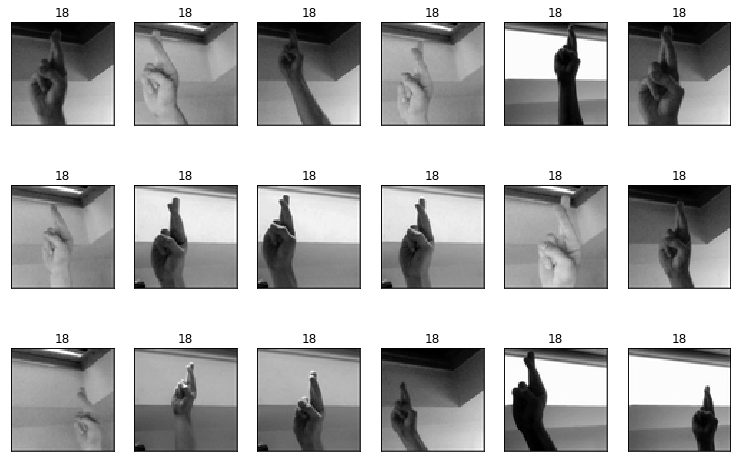

In [14]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, 72, 72) # defaults to showing a 3 by 6 subset of the faces

Based on the result of Lab2, we decide to choose Kernel PCA to do the demension reduction.

In [15]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces, not calculating inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=False, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenfaces from 4176 faces, not calculating inverse transform
CPU times: user 13.7 s, sys: 682 ms, total: 14.4 s
Wall time: 8.35 s


In [16]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenfaces from 4176 faces, ALSO getting inverse transform
CPU times: user 18.8 s, sys: 856 ms, total: 19.7 s
Wall time: 10.1 s


In [17]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

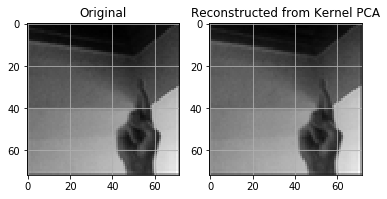

In [18]:
idx_to_reconstruct = 100    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(kpca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((72, 72)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((72, 72)), cmap=plt.cm.gray)
plt.title('Reconstructed from Kernel PCA')
plt.grid()

## Evaluation Choosing (30 points total)
### Metric choose and reason
There are four metrics methods, which are precision, recall, F1 and accuracy. Precision foucus on the false positive rate, and recall focuses on the false negative rate. F1 focuses on both false positive and false negative rate. Accuracy is about the instance rate we predict correctly.<br />
In our case study, false negative means that the child sent a gesture for help, but we did not recognize it. Compared with the situation that we mistake other gestures as a distress gesture, minimize false negative contribute more to saving the child. We would rather increase the value of the false positive, increase the workload, and not miss a clue that may appear which is false negative rate. So we want to minimize the false negative rate, that is the reason we choose recall. <br />
The function of recall as below:
$$Recall_{macro} = \frac{ T_{1} + ... + T_{n}}{(T_{1} + ... + T_{n} + F_{1} + ... + F_{n})*n}$$


### Divide Dataset
For spliting data, we can use Kfold and StratifiedShuffleSplit(). First, in KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest. In ShuffleSplit, the data is shuffled every time, and then split. This means the test sets may overlap between the splits.
Compared with KFold, StratifiedShuffleSplit is a very practical function. Before data sets are divided, shuffling operation should be carried out first; otherwise, overfitting is likely to occur and the generalization ability of the model will decline. Furthermore, speed reduction, speed of running data is also very important for our modeling. <br />
In our dataset, we use StratifiedShuffleSplit method to split our data in order to prevent overfitting and reduce the running time, which is necessary because it takes much time to iterate 200 times. Furthermore, to avoid data snooping, because the data type we input into the model in future is unlabeled. Such being the case, we also need to split training set into validation set and training set where we can better training our hyper-parameters and then we put the trained hyperparameters in the validation data to check if it is a good set of parameters or not. Finally, the best parameters were selected and put into the testing data to observe the results. In the process of split data, we divide the whole dataset into 10 folds, where 1 fold acts as testing set and others act as training set. Then we divide the training set evenly, as training set and validation set respectively.

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
# outer loop is 10 folders
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, train_size = 0.8,
                                 random_state=64)

for train_index, test_index in sss.split(X, y):  
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

We use this part of code in the later Hyper-parameter part(in CustumizedMLP class).

## Modeling (45 points total)

### Multi-layer Perception
The following part is mostly from Dr.Larson's. And we did some modification on it to achieve our multi-layer perception.    
We change A4 the output layer and make A2 iterativly training as the hidden layer of our neural network. To make A2 iterativly training, we add a for loop in feedforward process. Basically, we only add one layer(with changes of get_gradient function and other functions) making this neural network a Three layer neural. But with the hidden_layer training, it could become multi_layer neural network with more precise result.
We add a new parameter * hidden_layer * to customize our implementation of the multi-layer perception. Through this, we could support for any number of hidden layers.  
We also import all packages we need in this part firstly.


In [21]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, hidden_layer = 1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.hidden_layer = hidden_layer
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        # print("W1",self.n_hidden)
        
        # We add a hidden layer
        W2_num_elems = (self.n_hidden + 1)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden, self.n_hidden + 1)
        
        W3_num_elems = (self.n_hidden + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2, W3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

In [25]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        # train the hidden_layers
        for num in range(hidden_layer):
            A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        grad3 = np.zeros(W3.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,a4, y) in zip(A1.T,A2.T,A3.T,A4.T,Y_enc.T):
            
            dJ_dz3 = -2*(y - a4)*a4*(1-a4) # output layer
            
            dJ_dz2 = (dJ_dz3 @ W3) @ np.diag(a3*(1-a3))   
            
            dJ_dz1 = dJ_dz2[1:] @ W2 @ np.diag(a2*(1-a2)) 
       
            grad3 += dJ_dz3[:,np.newaxis]  @ a3[np.newaxis,:]
            grad2 += dJ_dz2[1:,np.newaxis] @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)
        grad3[:, 1:] += (W3[:, 1:] * self.l2_C)
        

        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.hidden_layer)
        # A1, Z1, A2, Z2, A3, Z3, A4
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data,self.W1,self.W2,self.W3, self.hidden_layer)
            
            cost = self._cost(A4,Y_enc,self.W1,self.W2,self.W3)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2, W3=self.W3)
            
            self.gradw1.append(np.mean(grad1))
            self.gradw2.append(np.mean(grad2))
            self.gradw3.append(np.mean(grad3))

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            self.W3 -= self.eta * grad3
            
        self.gradw1 = np.array(self.gradw1)
        self.gradw2 = np.array(self.gradw2)
        self.gradw3 = np.array(self.gradw3)
            

        return self

We build a CustomizedMLP class. In this class, we inherit TwoLayerPerceptron class which can customize the number of layers. So we could not only change the number of layers, but we could customized selectable phi function for the initial layer and hidden layer: either sigmoid or linear and a selectable cost function when instantiated: either quadratic or cross entropy. 



We add a new parameter * linear_hidden_layer * to customize our implementation of the activation phi function. Our default is using sigmoid. Through this, we could change the phi function either sigmoid or linear in initial layer and hidden layer. 

We add a new parameter * cross_entropy * to customize our implementation of the cost function. Our cost function default is cross_entropy, so we could change the cost function either quadratic or cross entropy in each back propagation and update the each weight of gradient to minimize our cost function.  

In [26]:
# code adapted from https://github.com/jakecarlson1/machine-learning-labs/blob/master/Lab5/Lab%205%20-%20Evaluation%20and%20Multi-Layer%20Perceptron.ipynb
class CustomizedMLP(TwoLayerPerceptron):
    
    def __init__(self,
                 linear_hidden_layer=False, # True: use linear function in hidden layer
                                            # False: use sigmoid function in hidden layer
                 cross_entropy=False, # True: use cross_entropy
                                      # False: use quadratic
                 **kwds):
        # but keep other keywords
        super().__init__(**kwds)
        
        self.linear_hidden_layer = linear_hidden_layer # default is False
        self.cross_entropy = cross_entropy
        self.gradw1 = []
        self.gradw2 = []
        self.gradw3 = []
    
    def _linear(self, z):
        return z
    
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        for num in range(hidden_layer):
            if self.linear_hidden_layer:
                A2 = self._linear(Z1)
            else: A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        # Compute gradient step using backpropagation.
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        grad3 = np.zeros(W3.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,a4, y) in zip(A1.T,A2.T,A3.T,A4.T,Y_enc.T):
            if self.cross_entropy:
                dJ_dz3 = (a4 - y) # output layer cross entropy
            else: 
                dJ_dz3 = -2*(y - a4)*a4*(1-a4) # quadratic
            
            dJ_dz2 = (dJ_dz3 @ W3) @ np.diag(a3*(1-a3))
            
            dJ_dz1 = dJ_dz2[1:] @ W2 @ np.diag(a2*(1-a2)) 
            
            grad3 += dJ_dz3[:,np.newaxis]  @ a3[np.newaxis,:]
            grad2 += dJ_dz2[1:,np.newaxis] @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            
        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)
        grad3[:, 1:] += (W3[:, 1:] * self.l2_C)
        
        return grad1, grad2, grad3
    

We set up a new model parameters which phi function is linear and cost function is cross entropy. 

In [36]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              hidden_layer = 3,
              linear_hidden_layer = False,
              cross_entropy = True)

Then we get the accuracy of this model in testing set, 0.033

In [37]:
%%time 
#nn = TwoLayerPerceptron(**params)
nn = CustomizedMLP(**params)
nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Test accuracy_score:',accuracy_score(y_test,yhat))
print('Test recall_score:',recall_score(y_test,yhat,average='macro'))
print('Test precision_score:',precision_score(y_test,yhat,average='macro'))
print('Test f1_score:',f1_score(y_test,yhat,average='macro')) 

Epoch: 200/200

Test accuracy_score: 0.023923444976076555
Test recall_score: 0.023193760262725783
Test precision_score: 0.0074796455971662115
Test f1_score: 0.009884975736427788
CPU times: user 4min 12s, sys: 11.9 s, total: 4min 24s
Wall time: 3min 25s


/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


From the result above, we could see that the accuracy of recall is the second highest. Even though it is not highest accuracy, we choose recall as our evaluate performance metric because in our business case, we try to reduce false negative rate. So that we could improve the children rescue rate.

### Visualization


In this part, we visualize the magnitude of the gradients in each layer of the neural network versus the training iteration.  
From the diagram, we could see that gradients don't stay consistent in each layer. For w1, the gradient seems consistent. For w2, the gradient stay consistent between iteration 10-50, then start fluctuating after about 50th iteration. For w3, the gradient is very high at the first, then it quickly comes down and stay consistent between 10-50. After that, it starts fluctuating more heavily than w2.  

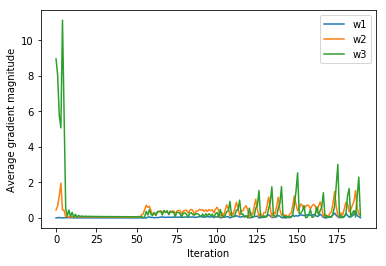

In [38]:
ax = plt.subplot(1,1,1)
plt.plot(abs(nn.gradw1[10:]), label='w1')
plt.plot(abs(nn.gradw2[10:]), label='w2')
plt.plot(abs(nn.gradw3[10:]), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

### Hyper-Parameters Tuning
Tune the hyper-parameters of your MLP model (phi function, objective function, and number of layers). We set up the hidden layer in to 3, 4, 5, 6, 7. And each layer has two cost functions and two phi functions. In addition, we use StratifiedShuffleSplit as our metric evaluation. Therefore, there are totally having 5(different layers) * 2(different phi functions) * 2(different cost functions) = 20 combinations. 

In [41]:
hidden_layer = [3,4,5,6,7]
linear_hidden_layer = [True, False]
cross_entropy = [True, False]
combo = []
accuracy = []
for eachlayer in hidden_layer:
    for eachlinear in linear_hidden_layer:
        for eachentropy in cross_entropy:
            temp_combo = [eachlayer, eachlinear, eachentropy] # prepare for the plot x axis
            combo.append(temp_combo)
            
for each in combo:
    params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=50, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              hidden_layer = each[0],
              linear_hidden_layer = each[1],
              cross_entropy = each[2])
    
    # outer loop is 10 folders
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, 
                                 random_state=64)
    
    for train_index, test_index in sss.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
    
        nn = CustomizedMLP(**params)
        nn.fit(X_train, y_train, print_progress=10)
        yhat = nn.predict(X_test)
        accuracy.append(recall_score(y_test,yhat,average='macro'))
    # each.append(accuracy)

Epoch: 50/50/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
Epoch: 50/50

In [42]:
print("number of accuracy:",len(accuracy))
print(accuracy)

number of accuracy: 200
[0.034482758620689655, 0.034482758620689655, 0.053422795991166984, 0.05945303210463733, 0.0346526244267029, 0.05112960760998811, 0.034482758620689655, 0.034482758620689655, 0.03567181926278241, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655, 0.034482758620689655, 0.04849668761678274, 0.03333333333333333, 0.05945303210463733, 0.034482758620689655, 0.03333333333333333, 0.032266009852216754, 0.024220032840722498, 0.045197044334975366, 0.03329369797859691, 0.03230706075533662, 0.03908045977011495, 0.02532840722495895, 0.051970443349753696, 0.02647783251231527, 0.026668931544080173, 0.03210463733650416, 0.027560727025649736, 0.022592152199762187, 0.027348394768133177, 0.040512994734160014, 0.02501273993545099, 0.03609648377781553, 0.028834720570749105, 0.022592152199762187, 0.034482758620689655, 0.034482758620689655, 0.053422795991166984, 0.05945303210463733, 0.0346526244267029, 0.051

We combine the accuracy with hyper-parameters into a dataframe to help us draw the plot.

In [43]:
hiddenlayer = []
linear = []
crossentropy = []
combonum = []
combocount = 1

for item in combo:
    for i in range(10):
        hiddenlayer.append(item[0])
        linear.append(item[1])
        crossentropy.append(item[2])
        combonum.append(combocount)
    combocount = combocount + 1
    
d = {'hidden layer': hiddenlayer, 'linear': linear, 
     'cross entropy': crossentropy, 'accuracy%': accuracy, 'combonum':combonum}
df = pd.DataFrame(data = d) 
df['accuracy%'] = df['accuracy%']*100
print(df)   

     hidden layer  linear  cross entropy  accuracy%  combonum
0               3    True           True   3.448276         1
1               3    True           True   3.448276         1
2               3    True           True   5.342280         1
3               3    True           True   5.945303         1
4               3    True           True   3.465262         1
5               3    True           True   5.112961         1
6               3    True           True   3.448276         1
7               3    True           True   3.448276         1
8               3    True           True   3.567182         1
9               3    True           True   3.448276         1
10              3    True          False   3.448276         2
11              3    True          False   3.448276         2
12              3    True          False   3.448276         2
13              3    True          False   3.448276         2
14              3    True          False   3.448276         2
15      

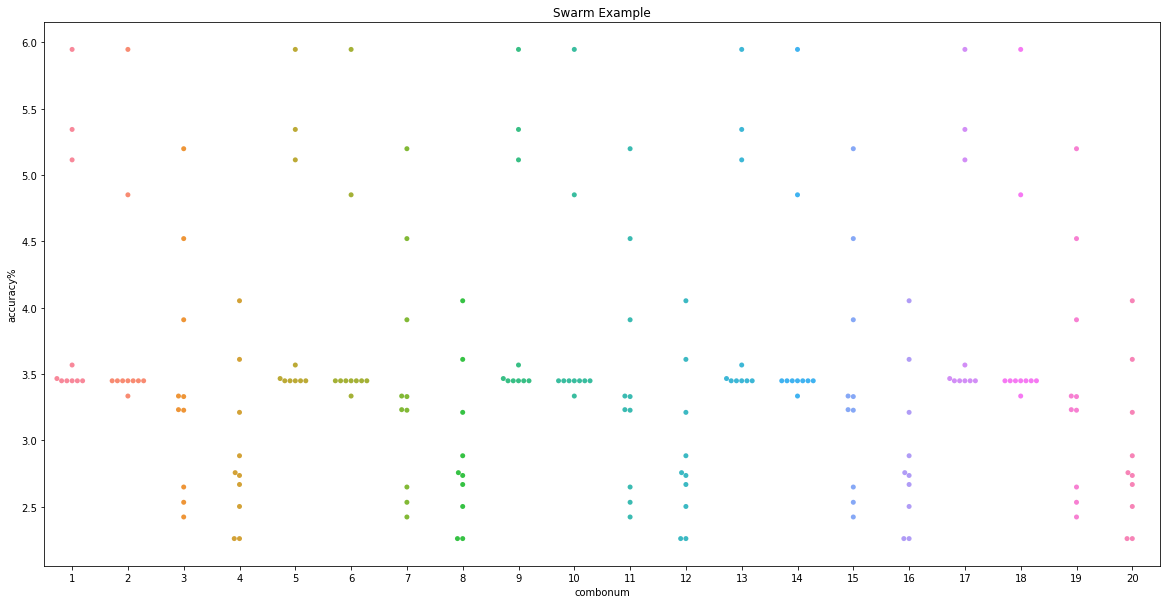

In [45]:
import seaborn as sns
plt.subplots(figsize=(20, 10))

sns.swarmplot(x = df['combonum'], y = df['accuracy%'])
plt.title('Swarm Example')

plt.show()

The swarmplot shows accuracy distribution with combinations. It seems combination 1 has higher accuracy distribution, and combination 2 has more stable accuracy distribution. Also there is a pattern that every 4th combination show the same accuracy distribution (like 1 , 5, 9, 13, 17).  
Combination 1, 5, 9, 13, 17: hidden layer = 3，4，5，6，7, linear = True, cross entropy = True  
Combination 2, 6, 10, 14, 18: hidden layer = 3, 4, 5, 6, 7, linear = True, cross entropy = False  
So we think any hidden layer with linear activation function in hidden layers, also with cross entropy method has more accurate result.

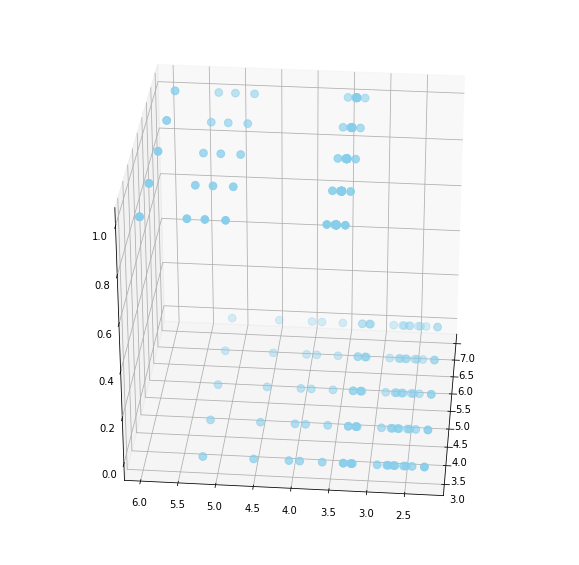

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['hidden layer'],df['accuracy%'],  df['linear'], c='skyblue', s=60)
#ax.scatter(df['hidden layer'], df['accuracy%'],df['cross entropy'], c='red', s=60)
# ax = plt.scatter(x=df['hidden layer'], y=df['accuracy'],c='r')
ax.view_init(30, 185)
plt.show()

The plot above, X-axis is hidden layer number. Y-axis is accuracy%. Z-axis is whether or not using linear activation function in hidden layers ( 1 = use, 0 = not use).  
From the plot, we could see that accuracy is higher and more concentrated when using linear function. But the hidden layer number seems not effect the accuracy.

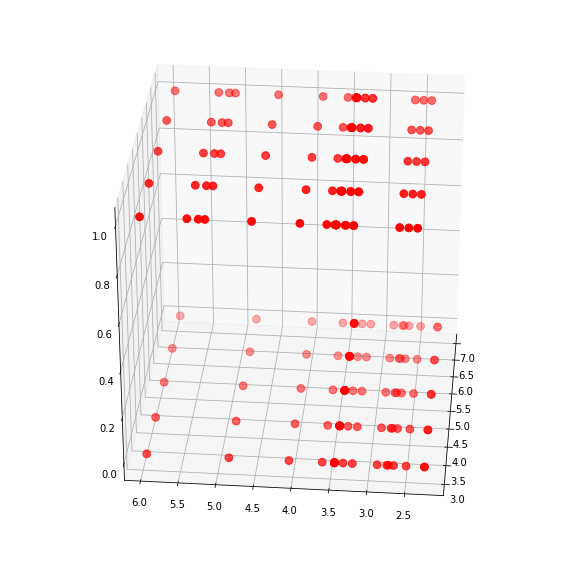

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['hidden layer'],df['accuracy%'],  df['linear'], c='skyblue', s=60)
ax.scatter(df['hidden layer'], df['accuracy%'],df['cross entropy'], c='red', s=60)
# ax = plt.scatter(x=df['hidden layer'], y=df['accuracy'],c='r')
ax.view_init(30, 185)
plt.show()

The plot above, X-axis is hidden layer number. Y-axis is accuracy%. Z-axis is whether or not using cross entropy as loss function( 1 = use, 0 = not use).  
From the plot, we could see that accuracy is higher and more concentrated when using cross entropy. But the hidden layer number seems not effect the accuracy.

## Exceptional Work (10 points total)
In this part, we implement two more phi functions: ReLU and SiLU (also called Swish). We also compare their performance to the linear and sigmoid phi functions. 

In [55]:
class MLPwithReLUandSiLU(CustomizedMLP):
    
    def __init__(self,
                 phi = 'sigmoid',
                 **kwds):
        # but keep other keywords
        super().__init__(**kwds)
        
        self.phi = phi
    
    def _relu(self, z):
        return np.maximum(0,z.copy())
    
    def _silu(self, z):
        return z*expit(z)
    
    def _feedforward(self, X, W1, W2, W3, hidden_layer):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for input layer -> hidden layer.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        
        for num in range(hidden_layer):
            if self.phi == 'linear':
                A2 = self._linear(Z1)
            elif self.phi == 'relu':
                A2 = self._relu(Z1)
            elif self.phi == 'silu':
                A2 = self._silu(Z1)
            else: A2 = self._sigmoid(Z1)
            A2 = self._add_bias_unit(A2, how='row')
            Z2 = W2 @ A2
        
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

In [68]:
phi = ['linear','sigmoid','relu','silu']
import time
runtime = []
acc= []
for p in phi:
    params = dict(n_hidden=50, 
                  C=0.1, # tradeoff L2 regularizer
                  epochs=200, # iterations
                  eta=0.001,  # learning rate
                  random_state=1,
                  hidden_layer = 3,
                  phi = p,
                  cross_entropy = True)
  
    runtime.append(time.clock()) 
    nn = MLPwithReLUandSiLU(**params)
    nn.fit(X_train, y_train, print_progress=10)
    yhat = nn.predict(X_test)
    runtime[-1] = time.clock() - runtime[-1]
    acc.append(recall_score(y_test,yhat,average='macro'))
    print('Test time of',p,':',runtime[-1])
    print('Test acc of',p,':',acc[-1])

Epoch: 200/200

Test time of linear : 237.85871300000144
Test acc of linear : 0.034482758620689655


Epoch: 200/200/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Test time of sigmoid : 304.43634999999995
Test acc of sigmoid : 0.023193760262725783


Epoch: 200/200

Test time of relu : 297.3042949999981
Test acc of relu : 0.034482758620689655


Epoch: 200/200

Test time of silu : 238.49180200000046
Test acc of silu : 0.034482758620689655


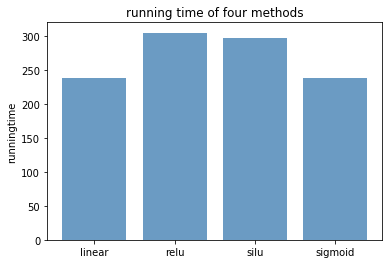

In [69]:
import matplotlib.pyplot as plt

plt.bar(range(4), runtime, align = 'center',color='steelblue', alpha = 0.8)
plt.ylabel('runningtime')

plt.title('running time of four methods')
plt.xticks(range(4),['linear','relu','silu','sigmoid'])

plt.show()

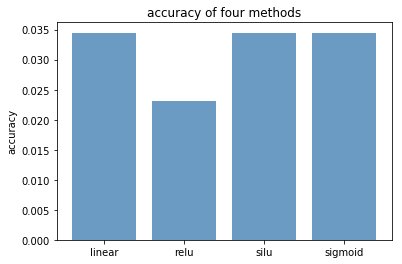

In [70]:
import matplotlib.pyplot as plt

plt.bar(range(4), acc, align = 'center',color='steelblue', alpha = 0.8)
plt.ylabel('accuracy')

plt.title('accuracy of four methods')
plt.xticks(range(4),['linear','relu','silu','sigmoid'])

plt.show()

In this section, we decide to use two methods to evaluate the four different phi approaches. The first method is to compare their running time (including training and testing time), and the second method is to compare their performance accuracy.
According to the above plot, we can find that, ReLU and SiLU has the longest running time. Linear, SiLU and sigmoid has the highest accuracy. ReLU is slow and with low accuracy. SiLU is slow but with high accuracy.